# Prevendo a contratação do produto bancário em campanhas de marketing

## importando os dados

In [388]:
# Importando os módulos
import pandas as pd                 
import matplotlib.pyplot as plt 
import numpy as np  
import seaborn as sns
sns.set_style('darkgrid')
plt.style.use('ggplot')           
%matplotlib inline          

In [389]:
# Carregando o dataset
df = pd.read_csv(".\data-insight-assessment\data\campaigns.csv", sep = ',')   

## Analise dos dados

In [390]:
#verificando as primeiras linhas
df.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [391]:
#verificando as últimas linhas
df.tail()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
40685,45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
40686,45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
40687,45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
40688,45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
40689,45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [392]:
df.describe()

,Unnamed: 0,age,balance,day,duration,campaign,pdays,previous
count,40690.000000,40690.000000,40690.000000,40690.000000,40690.000000,40690.000000,40690.000000,40690.000000
mean,22593.702925,40.905407,1359.697518,15.808405,258.243844,2.764586,40.059867,0.579405
std,13064.342451,10.604908,3034.248783,8.318281,257.577068,3.110158,100.078281,2.350664
min,0.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11257.500000,33.000000,74.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,22562.500000,39.000000,451.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33929.750000,48.000000,1423.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,45210.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


* **A idade mínima é 18 anos e a média é 41.**
* **O Saldo médio dos clientes é $ 1360.** 

In [393]:
#verificando se existe algum valor nulo
df.isnull().sum()

Unnamed: 0    0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
y             0
dtype: int64

In [328]:
# Verificando o formato dos dados
df.shape

(40690, 18)

In [329]:
#verificando as colunas do Dataset
df.columns

Index(['Unnamed: 0', 'age', 'job', 'marital', 'education', 'default',
       'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')

***Apesar de não termos nenhum valor faltante no dataset verificamos que temos vários valores unknown. Vamos verificar abaixo
qual o percentual desse tipo de dado temos em cada coluna.***

In [330]:
lista = ['job', 'marital', 'education', 'default','housing', 'loan', 'contact', 'month','poutcome', 'y']
for l in lista:
    print(l,'qte de unknown:',df[l].str.contains('unknown').sum(), 'o que representa', round(100*df[l].str.contains('unknown').sum()/df.shape[0],1),'% do total dos dados')

job qte de unknown: 254 o que representa 0.6 % do total dos dados
marital qte de unknown: 0 o que representa 0.0 % do total dos dados
education qte de unknown: 1669 o que representa 4.1 % do total dos dados
default qte de unknown: 0 o que representa 0.0 % do total dos dados
housing qte de unknown: 0 o que representa 0.0 % do total dos dados
loan qte de unknown: 0 o que representa 0.0 % do total dos dados
contact qte de unknown: 11771 o que representa 28.9 % do total dos dados
month qte de unknown: 0 o que representa 0.0 % do total dos dados
poutcome qte de unknown: 33284 o que representa 81.8 % do total dos dados
y qte de unknown: 0 o que representa 0.0 % do total dos dados


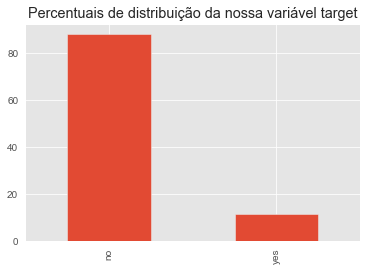

In [331]:
(df['y'].value_counts(normalize=True)*100).plot.bar(title='Percentuais de distribuição da nossa variável target');

### Verificando a distribuição das variáveis numéricas em relação ao nosso target

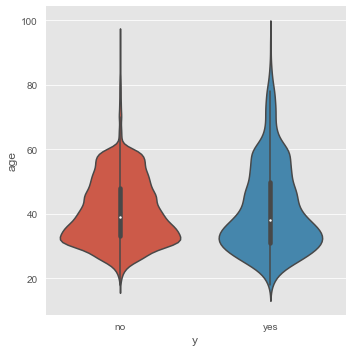

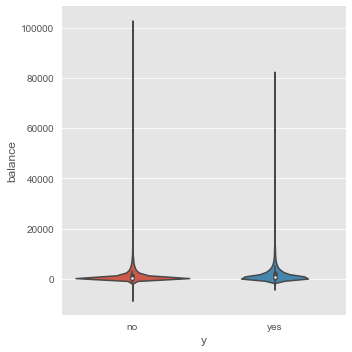

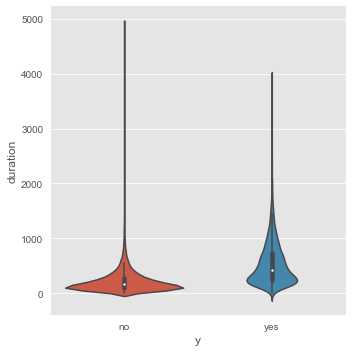

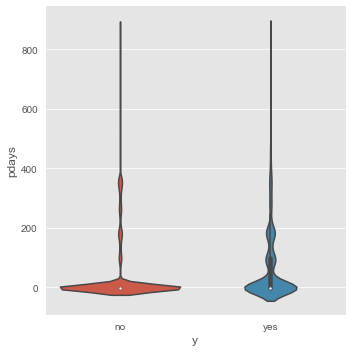

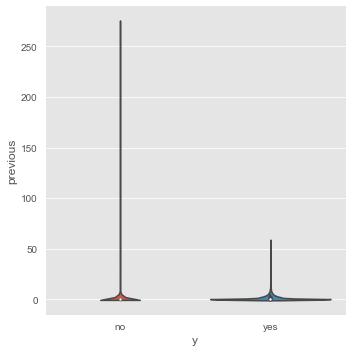

In [332]:
var = ['age','balance','duration','pdays','previous']
for v in var:
    sns.catplot(x="y", y=v, kind='violin', data=df);

* **Em um breve análise conseguimos ver que os clientes com mais de 60 anos tem um tendência maior de contratar o produto, essa tendência se inverte abaixo dessa idade.**
* **As colunas de duration e balance possuem muitos outliers, talvez seja prudente utilizar algum tipo de transformação ou padronização dos dados.**
* **É visível que clientes com maiores durações do último contato tendem a contratar mais.**


### Verificando a distribuição de algumas variáveis categóricas em relação ao nosso target

In [333]:
def get_ct(df, var):
    ct_res = pd.crosstab(df[var], df['y'], margins=True)
    ct_res['NO(%)'] = round( ct_res['no']/ct_res['All']*100, 2)
    ct_res['YES(%)'] = round( ct_res['yes']/ct_res['All']*100, 2)
    return ct_res.drop(columns='All')

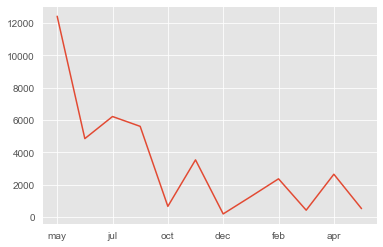

In [334]:
df.month.value_counts()[df.month.unique()].plot()

In [335]:
get_ct(df, 'month')

y,no,yes,NO(%),YES(%)
month,,,,
apr,2124,522,80.27,19.73
aug,4977,629,88.78,11.22
dec,101,92,52.33,47.67
feb,1966,397,83.20,16.80
jan,1141,127,89.98,10.02
jul,5641,573,90.78,9.22
jun,4358,490,89.89,10.11
mar,197,227,46.46,53.54
may,11575,838,93.25,6.75


**Com relação a sazonalidade temos 4 meses (dezembro, outubro, setembro e março), em que pese, temos poucos contatos mas temos um aproveitamento bastante superior aos demais. Eu investigaria isso junto ao gestor da área** 

In [336]:
get_ct(df, 'day')

y,no,yes,NO(%),YES(%)
day,,,,
1,207,80,72.13,27.87
2,995,156,86.45,13.55
3,810,165,83.08,16.92
4,1095,205,84.23,15.77
5,1529,199,88.48,11.52
6,1574,164,90.56,9.44
7,1490,146,91.08,8.92
8,1460,184,88.81,11.19
9,1251,163,88.47,11.53


**Com relação ao dia conseguimos observar tambem um certa sazonalidade, porem em menor escala que no caso dos meses.**

In [337]:
get_ct(df, 'job')

y,no,yes,NO(%),YES(%)
job,,,,
admin.,4083,578,87.60,12.40
blue-collar,8132,637,92.74,7.26
entrepreneur,1226,113,91.56,8.44
housemaid,1030,95,91.56,8.44
management,7326,1178,86.15,13.85
retired,1560,467,76.96,23.04
self-employed,1255,172,87.95,12.05
services,3394,331,91.11,8.89
student,601,247,70.87,29.13


**Aposentados e Estudantes percentualmente tendem a comprar mais esse produto.** 

In [338]:
get_ct(df, 'education')

y,no,yes,NO(%),YES(%)
education,,,,
primary,5626,527,91.44,8.56
secondary,18717,2234,89.34,10.66
tertiary,10123,1794,84.95,15.05
unknown,1437,232,86.10,13.90
All,35903,4787,88.24,11.76


**Pessoas com maior nível educacional tendem a comprar mais o produto**

In [339]:
get_ct(df, 'marital')

y,no,yes,NO(%),YES(%)
marital,,,,
divorced,4124,571,87.84,12.16
married,21982,2482,89.85,10.15
single,9797,1734,84.96,15.04
All,35903,4787,88.24,11.76


**Solteiros tendem a comprar mais o produto**

In [340]:
get_ct(df, 'housing')

y,no,yes,NO(%),YES(%)
housing,,,,
no,14988,3041,83.13,16.87
yes,20915,1746,92.30,7.70
All,35903,4787,88.24,11.76


**Pessoas sem empréstimos imobiliários em média tem mais que o dobro de probabilidade de comprar o produto.**

In [341]:
get_ct(df, 'loan')

y,no,yes,NO(%),YES(%)
loan,,,,
no,29833,4344,87.29,12.71
yes,6070,443,93.20,6.80
All,35903,4787,88.24,11.76


**Pessoas sem empréstimos em média tem quase o dobro de probabilidade de comprar o produto.**

In [342]:
get_ct(df, 'campaign')

y,no,yes,NO(%),YES(%)
campaign,,,,
1,13499,2318,85.34,14.66
2,9960,1258,88.79,11.21
3,4443,560,88.81,11.19
4,2865,296,90.64,9.36
5,1463,126,92.07,7.93
6,1058,82,92.81,7.19
7,603,43,93.34,6.66
8,466,30,93.95,6.05
9,278,18,93.92,6.08


**Com relação as campanhas a primeira e maior delas teve a melhor performance e depois foram perdendo efetividade.** 

In [343]:
get_ct(df, 'poutcome')

y,no,yes,NO(%),YES(%)
poutcome,,,,
failure,3819,558,87.25,12.75
other,1365,283,82.83,17.17
success,487,894,35.26,64.74
unknown,30232,3052,90.83,9.17
All,35903,4787,88.24,11.76


**Os clientes que tiveram sucesso no último contato tem muito mais chance de contratar o produto.**

In [344]:
get_ct(df, 'contact')

y,no,yes,NO(%),YES(%)
contact,,,,
cellular,22363,3956,84.97,15.03
telephone,2242,358,86.23,13.77
unknown,11298,473,95.98,4.02
All,35903,4787,88.24,11.76


**O Celular é o meio de contato mais assertivo**

In [345]:
#transformando algumas variáveis
Lib_map = {'yes' : 1, 'no' : 0}
columns = [ 'default','housing','loan','y']
for c in columns:
    df[c] = df[c].map(Lib_map)

In [346]:
# Identificando a correlação entre as variáveis
def plot_corr(df, size=10):
    corr = df.corr()    
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)  
    plt.xticks(range(len(corr.columns)), corr.columns) 
    plt.yticks(range(len(corr.columns)), corr.columns)  

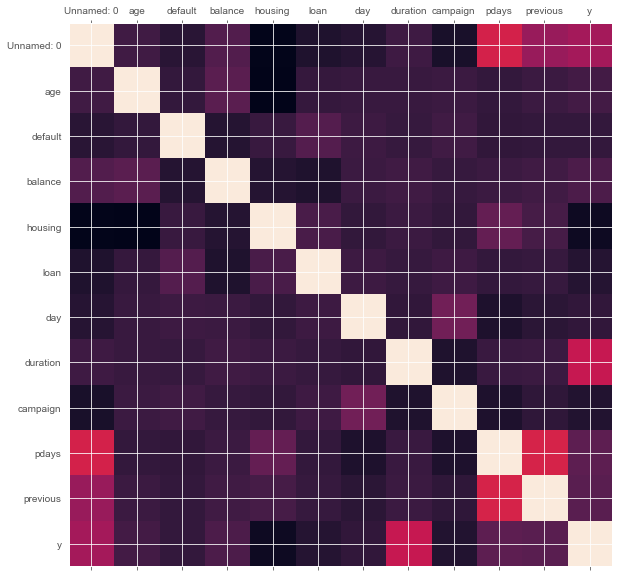

In [347]:
# Criando o gráfico
plot_corr(df)

In [348]:
# Visualizando a correlação em tabela
# Coeficiente de correlação: 
# +1  = forte correlação positiva
# 0   = não há correlação
# -1  = forte correlação negativa
df.corr()

,Unnamed: 0,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
Unnamed: 0,1.000000,0.014803,-0.054010,0.071755,-0.175612,-0.083445,-0.062344,0.012770,-0.101542,0.437423,0.265857,0.297776
age,0.014803,1.000000,-0.019015,0.095720,-0.184381,-0.015712,-0.007054,-0.004002,0.004047,-0.020289,0.003412,0.024339
default,-0.054010,-0.019015,1.000000,-0.067468,-0.006270,0.074963,0.009222,-0.009643,0.016945,-0.029838,-0.018578,-0.022080
balance,0.071755,0.095720,-0.067468,1.000000,-0.067671,-0.084294,0.002868,0.018848,-0.012009,0.001731,0.016188,0.052306
housing,-0.175612,-0.184381,-0.006270,-0.067671,1.000000,0.044498,-0.024351,0.001876,-0.023150,0.122092,0.035193,-0.141266
loan,-0.083445,-0.015712,0.074963,-0.084294,0.044498,1.000000,0.007090,-0.012957,0.010199,-0.021691,-0.008915,-0.067242
day,-0.062344,-0.007054,0.009222,0.002868,-0.024351,0.007090,1.000000,-0.030680,0.161699,-0.090618,-0.050149,-0.029398
duration,0.012770,-0.004002,-0.009643,0.018848,0.001876,-0.012957,-0.030680,1.000000,-0.084822,-0.002308,0.002023,0.397230
campaign,-0.101542,0.004047,0.016945,-0.012009,-0.023150,0.010199,0.161699,-0.084822,1.000000,-0.087880,-0.032480,-0.073457
pdays,0.437423,-0.020289,-0.029838,0.001731,0.122092,-0.021691,-0.090618,-0.002308,-0.087880,1.000000,0.445813,0.105627


In [349]:
# One hot encodding dos dados categóricos
df_cat = pd.get_dummies(df, columns=['job','marital',
                                         'education','default',
                                         'housing','loan',
                                         'contact','month',
                                         'poutcome'])

In [350]:
df_cat.columns

Index(['Unnamed: 0', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous', 'y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_0', 'default_1', 'housing_0', 'housing_1',
       'loan_0', 'loan_1', 'contact_cellular', 'contact_telephone',
       'contact_unknown', 'month_apr', 'month_aug', 'month_dec', 'month_feb',
       'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'poutcome_failure',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')

## Spliting

70% para dados de treino e 30% para dados de teste

In [351]:
from sklearn.model_selection import train_test_split

In [352]:
# Seleção de variáveis (Feature Selection)
atributos = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_0', 'default_1', 'housing_0', 'housing_1',
       'loan_0', 'loan_1', 'contact_cellular', 'contact_telephone',
       'contact_unknown', 'month_apr', 'month_aug', 'month_dec', 'month_feb',
       'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'poutcome_failure',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown']

In [353]:
# previsão
atrib_prev = ['y']


In [354]:
# Criando objetos
X = df_cat[atributos].values
Y = df_cat[atrib_prev].values

**Como o dataset está desbalanceado vou aplicar uma técnica de oversampling (SMOTE) para o balanceamento.**

In [355]:
#balanceando o dataset
from imblearn.over_sampling import (RandomOverSampler, 

                                    SMOTE, 
                                    ADASYN)
sampler = SMOTE(random_state=0)
X, Y = sampler.fit_sample(X, Y)


In [356]:
# Definindo a taxa de split
split_test_size = 0.30

In [357]:
# Criando dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = split_test_size, random_state = 42)

## Verificando o Split

In [358]:
print("Original True : {0} ({1:0.2f}%)".format(len(df.loc[df['y'] == 1]), 
                                               (len(df.loc[df['y'] ==1])/len(df.index) * 100)))

print("Original False : {0} ({1:0.2f}%)".format(len(df.loc[df['y'] == 0]), 
                                               (len(df.loc[df['y'] == 0])/len(df.index) * 100)))
print("")
print("Training True : {0} ({1:0.2f}%)".format(len(Y_treino[Y_treino[:] == 1]), 
                                               (len(Y_treino[Y_treino[:] == 1])/len(Y_treino) * 100)))

print("Training False : {0} ({1:0.2f}%)".format(len(Y_treino[Y_treino[:] == 0]), 
                                               (len(Y_treino[Y_treino[:] == 0])/len(Y_treino) * 100)))
print("")
print("Test True : {0} ({1:0.2f}%)".format(len(Y_teste[Y_teste[:] == 1]), 
                                               (len(Y_teste[Y_teste[:] == 1])/len(Y_teste) * 100)))

print("Test False : {0} ({1:0.2f}%)".format(len(Y_teste[Y_teste[:] == 0]), 
                                               (len(Y_teste[Y_teste[:] == 0])/len(Y_teste) * 100)))

Original True : 4787 (11.76%)
Original False : 35903 (88.24%)

Training True : 25171 (50.08%)
Training False : 25093 (49.92%)

Test True : 10732 (49.82%)
Test False : 10810 (50.18%)


## Construindo e treinando o modelo

In [359]:
# Utilizando um classificador Naive Bayes
from sklearn.naive_bayes import GaussianNB

In [360]:
# Criando o modelo preditivo
modelo_v1 = GaussianNB()

In [361]:
# Treinando o modelo
modelo_v1.fit(X_treino, Y_treino.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

## Verificando a exatidão no modelo nos dados de treino

In [362]:
from sklearn import metrics

In [363]:
nb_predict_train = modelo_v1.predict(X_treino)

In [364]:
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_treino, nb_predict_train)))
print()

Exatidão (Accuracy): 0.8985



## Verificando a exatidão no modelo nos dados de teste

In [365]:
nb_predict_test = modelo_v1.predict(X_teste)

In [366]:
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_teste, nb_predict_test)))
print()

Exatidão (Accuracy): 0.8951



## Métricas

In [367]:
# Criando uma Confusion Matrix
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(Y_teste, nb_predict_test, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(Y_teste, nb_predict_test, labels = [1, 0]))

Confusion Matrix
[[9633 1099]
 [1161 9649]]

Classification Report
              precision    recall  f1-score   support

           1       0.89      0.90      0.90     10732
           0       0.90      0.89      0.90     10810

    accuracy                           0.90     21542
   macro avg       0.90      0.90      0.90     21542
weighted avg       0.90      0.90      0.90     21542



# Otimizando o modelo com RandomForest

In [368]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


In [369]:
modelo_v2 = RandomForestClassifier(random_state = 42)
modelo_v2.fit(X_treino, Y_treino.ravel())


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [370]:
# Verificando os dados de treino
rf_predict_train = modelo_v2.predict(X_treino)
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_treino, rf_predict_train)))

Exatidão (Accuracy): 1.0000


In [371]:
# Verificando nos dados de teste
rf_predict_test = modelo_v2.predict(X_teste)
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_teste, rf_predict_test)))
print()

Exatidão (Accuracy): 0.9473



In [372]:
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_teste, rf_predict_test)))
print()
print("Classification Report")
print(metrics.classification_report(Y_teste, rf_predict_test, labels = [1, 0]))

Exatidão (Accuracy): 0.9473

Classification Report
              precision    recall  f1-score   support

           1       0.96      0.93      0.95     10732
           0       0.94      0.96      0.95     10810

    accuracy                           0.95     21542
   macro avg       0.95      0.95      0.95     21542
weighted avg       0.95      0.95      0.95     21542



In [373]:
scores = cross_val_score(estimator=modelo_v2,X=X, y=Y, cv= 5,
                         scoring="roc_auc", verbose=True)

"AUC %.2f +/- %.2f" % (scores.mean(), scores.std())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.1min finished


'AUC 0.94 +/- 0.10'

In [374]:
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(Y_teste, rf_predict_test, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(Y_teste, rf_predict_test, labels = [1, 0]))

Confusion Matrix
[[10017   715]
 [  420 10390]]

Classification Report
              precision    recall  f1-score   support

           1       0.96      0.93      0.95     10732
           0       0.94      0.96      0.95     10810

    accuracy                           0.95     21542
   macro avg       0.95      0.95      0.95     21542
weighted avg       0.95      0.95      0.95     21542



In [402]:
features

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40685,25,505,17,386,2,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
40686,51,825,17,977,3,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
40687,71,1729,17,456,2,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
40688,72,5715,17,1127,5,184,3,0,0,0,...,0,0,0,1,0,0,0,0,1,0


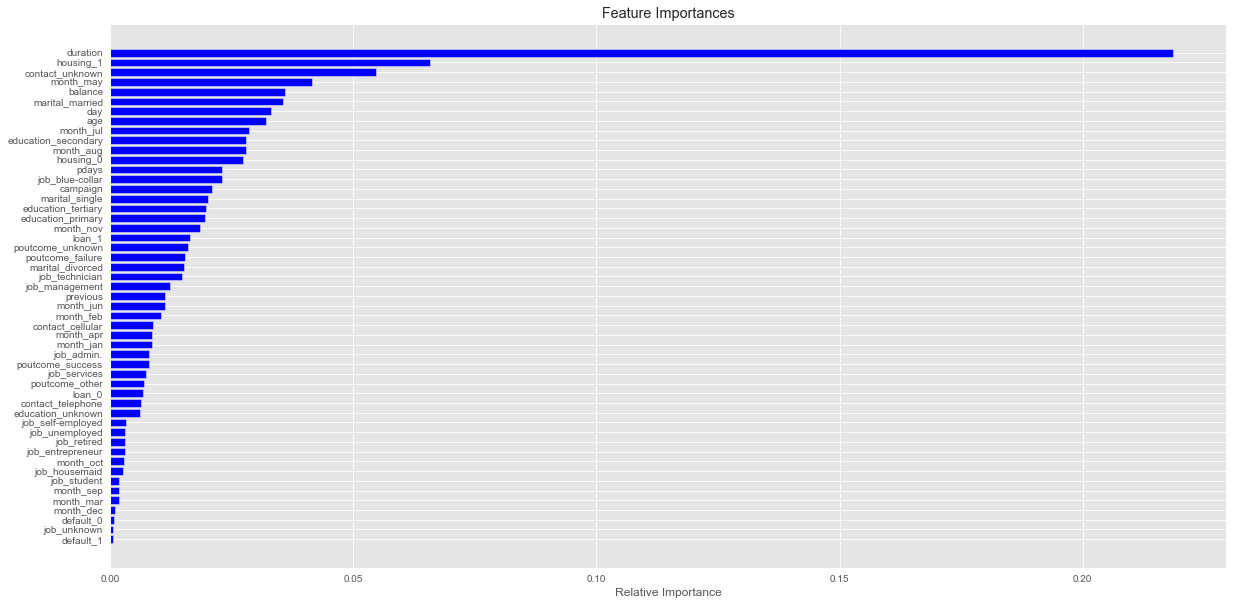

In [406]:
features = df_cat[atributos].columns.tolist()
importances = modelo_v2.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(20,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Xgboost

In [375]:
from xgboost import XGBClassifier

In [376]:
# Terceira versão do modelo usando Xgboost
modelo_v3 = XGBClassifier(random_state=42)
modelo_v3.fit(X_treino, Y_treino.ravel())
dt_predict_test = modelo_v3.predict(X_teste)

In [377]:
# Verificando os dados de treino
rf_predict_train = modelo_v3.predict(X_treino)
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_treino, rf_predict_train)))

Exatidão (Accuracy): 0.9754


In [378]:
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_teste, dt_predict_test)))
print()
print("Classification Report")
print(metrics.classification_report(Y_teste, dt_predict_test, labels = [1, 0]))

Exatidão (Accuracy): 0.9449

Classification Report
              precision    recall  f1-score   support

           1       0.95      0.94      0.94     10732
           0       0.94      0.95      0.95     10810

    accuracy                           0.94     21542
   macro avg       0.94      0.94      0.94     21542
weighted avg       0.94      0.94      0.94     21542



In [379]:
scores = cross_val_score(estimator=modelo_v3,X=X, y=Y, cv=5,
                         scoring="roc_auc", verbose=True)

"AUC %.2f +/- %.2f" % (scores.mean(), scores.std())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.3min finished


'AUC 0.95 +/- 0.05'

In [380]:
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(Y_teste, dt_predict_test, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(Y_teste, dt_predict_test, labels = [1, 0]))

Confusion Matrix
[[10058   674]
 [  514 10296]]

Classification Report
              precision    recall  f1-score   support

           1       0.95      0.94      0.94     10732
           0       0.94      0.95      0.95     10810

    accuracy                           0.94     21542
   macro avg       0.94      0.94      0.94     21542
weighted avg       0.94      0.94      0.94     21542



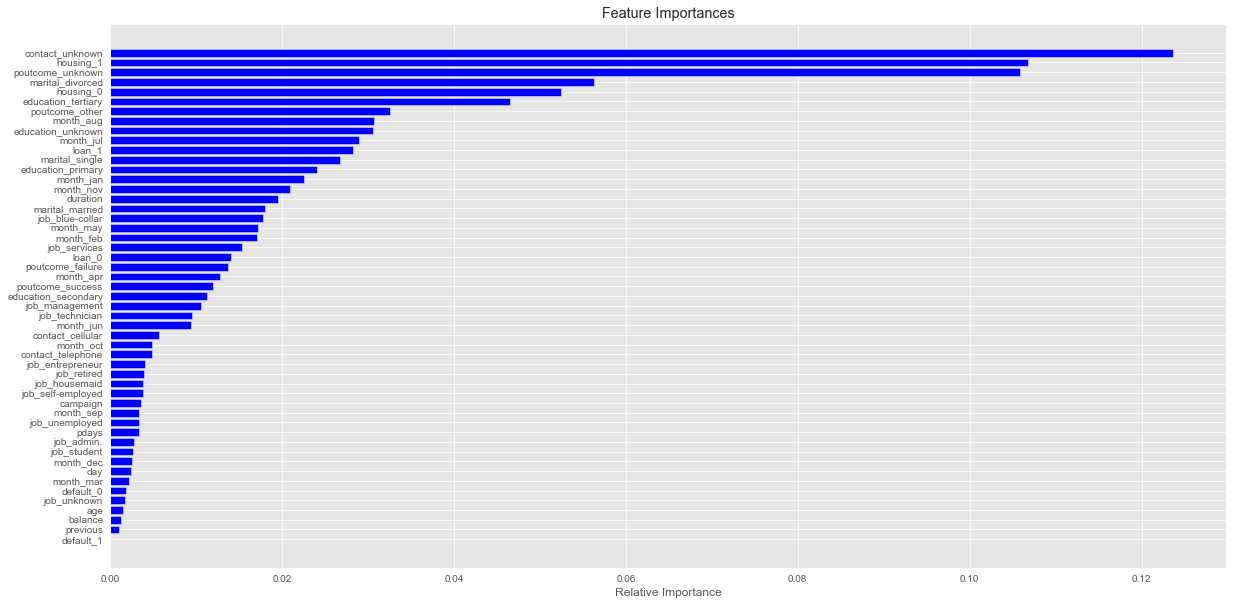

In [407]:
features = df_cat[atributos].columns.tolist()
importances = modelo_v3.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(20,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Resumindo
### Acurácia nos dados de teste

#### Modelo usando algoritmo Naive Bayes            = 0.8951
#### Modelo usando algoritmo Random Forest       = 0.9473
#### Modelo usando algoritmo Xgboot                     = 0.9449

#### Olhando apenas a acurácia a melhor performance nos dados de teste foi do Random Forest, já o Xgboost se saiu melhor na validação cruzada olhando para ROC_AUC, porém olhando para a feature importance eu utilizaria o Random Forest em produção por fazer mais sentido, apesar de correr o risco do overfitting. Antes eu tentaria ainda tunnar os hiperparametros para conseguir uma melhor acurácia.

## Plano de ação para o time de marketing:

* **Grande parte do esforço de marketing foi feito em meses sem muita assertividade nos contatos. A minha sugestão é que 
empreendam mais esforço nos meses de março, setembro, outubro e dezembro que apresentaram os melhores resultados.**

* **Clientes com empréstimos e financiamentos imobiliários tendem a adquirir menos o produto. Talvez seja mais produtivo começar os contatos com clientes sem empréstimos**

* **Em relação à profissão os mais propensos são os estudantes e os aposentados. Faz sentido apostar em campanhas para esses públicos**

* **O celular tende a ser o melhor meio de contato. Sugiro da foco nos clientes que possuem celular cadastrado.**

* **A eficácia cai muito a medida que mais contatos são feitos com o mesmo cliente. Limitar a quantidade de tentativas
para um mesmo cliente melhoria a performance do time.**

* **Por último há uma forte correlação entre a duração da chamada e a contratação. Sugiri pensar em um novo script mais envolvente para que os clientes pudessem ouvir um pouco mais. Talvez aumentando assim a chance de sucesso.**